In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot  as plt
import folium
from folium.plugins import MarkerCluster
import mplleaflet

AIS_path = r'.\Data'
AIS_data = []

# Iterate over files in the directory
for file_name in os.listdir(AIS_path):
    # Construct full file path
    file_path = os.path.join(AIS_path, file_name)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        # Open and read the file
        with open(file_path) as f:
            # Load JSON data from the file
            json_data = json.load(f)
            # Append loaded data to the list
            AIS_data.append(json_data)

# Normalize the JSON data
df = pd.json_normalize(AIS_data, 'data')

# Now you can work with your DataFrame 'data_normalized'
df

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
2,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [2]:
# data_normalized['vessel.type'].unique()
df['vessel.name'].unique()
# data_normalized['navigation.status'].unique()
# data_normalized['navigation.destination.name'].unique()
# data_normalized['navigation.location.long'].unique()

df['vessel.name'].value_counts()

TRUDIE            8909
JORDY-M           8906
CHARLOIS          8721
LEVANTE           8202
WESTERSCHELDE     7469
ROMEE             7198
JAN LEEGHWATER    7009
CAAN              7008
HELENA            6414
AARBURG           6339
ORION             1982
SUNMI             1128
MARIBO MAERSK      691
MAYVIEW MAERSK      25
CHARL                5
MKXTG C              2
8ELENA               1
JORDY CD1            1
"5FPV                1
MARIB                1
QE0>0                1
TRUDIH&'L            1
Name: vessel.name, dtype: int64

In [3]:
# from shapely.geometry import Point, Polygon

# # Define the coordinates of the polygon
# polygon_coords = [(51.549,3.080), (51.334,3.384), (51.317,4.198), (51.374,4.263), (51.798,6.065), (51.874,6.133), (53.752,6.349), (53.526,4.370)]

# # Create a Shapely Polygon object
# polygon = Polygon(polygon_coords)

# # Function to check if a point (latitude, longitude) is within the polygon
# def is_within_polygon(lat, lon):
#     point = Point(lat, lon)
#     return polygon.contains(point)

# # Filter DataFrame based on the polygon
# df = data_normalized[data_normalized.apply(lambda row: is_within_polygon(row['navigation.location.lat'], row['navigation.location.long']), axis=1)]

# Drop duplicates
df = df.drop_duplicates(subset=['vessel.imo', 'navigation.time'], keep='last')

# Ekkes spaties weghalen
df['navigation.status'] = df['navigation.status'].str.strip()

df


C:\Users\romyl\AppData\Local\Temp\ipykernel_21792\613253692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['navigation.status'] = df['navigation.status'].str.strip()


,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
6,3.0,2021-01-01T00:28:34+00:00,0.0,NaN,4.59393,51.68826,0.2,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [4]:
# df['vessel.callsign'].unique()
# df['device.mmsi'].unique()
# df['vessel.imo'].unique()

# Deze is waarschijnlijk het meest betrouwbaar gezien schepen echt hun eigen naam hebben. Niemand gebruikt dubbele namen.
df['vessel.name'].unique()
df['vessel.name'].value_counts()

TRUDIE            8797
CHARLOIS          8221
JORDY-M           7082
WESTERSCHELDE     6621
LEVANTE           6555
CAAN              5065
JAN LEEGHWATER    5057
AARBURG           4988
ROMEE             4890
HELENA            4397
ORION             1956
SUNMI             1070
MARIBO MAERSK      681
MAYVIEW MAERSK      15
CHARL                5
MKXTG C              2
8ELENA               1
JORDY CD1            1
"5FPV                1
MARIB                1
QE0>0                1
TRUDIH&'L            1
Name: vessel.name, dtype: int64

In [5]:
vessel_name_counts = df['vessel.name'].value_counts()
df = df[df['vessel.name'].isin(vessel_name_counts.index[vessel_name_counts > 5])]

df

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
6,3.0,2021-01-01T00:28:34+00:00,0.0,NaN,4.59393,51.68826,0.2,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [6]:
df['vessel.type'].value_counts()

cargo                      35541
dredging-underwater-ops    11678
other                       9955
tanker                      8221
Name: vessel.type, dtype: int64

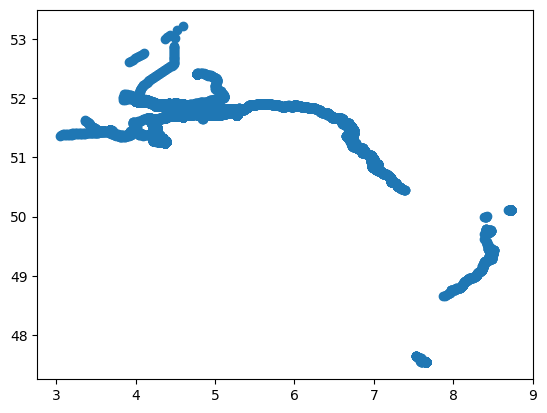

In [7]:
all_locations = plt.scatter(df['navigation.location.long'], df['navigation.location.lat'])

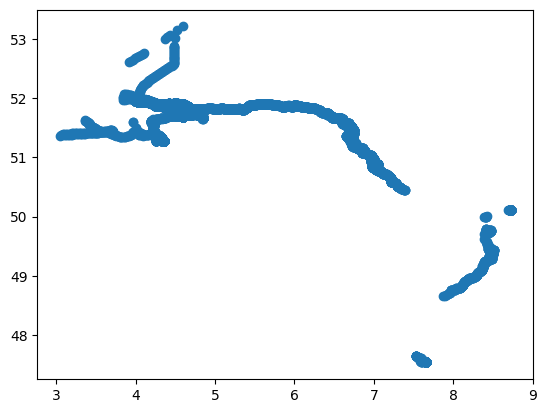

In [8]:
df_test1 = df[(df['vessel.type'] == 'cargo')]
locations = plt.scatter(df_test1['navigation.location.long'], df_test1['navigation.location.lat'])

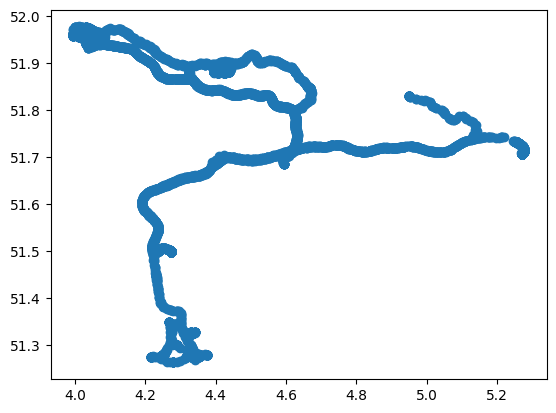

In [9]:
df_test2 = df[(df['vessel.type'] == 'other')]
locations = plt.scatter(df_test2['navigation.location.long'], df_test2['navigation.location.lat'])

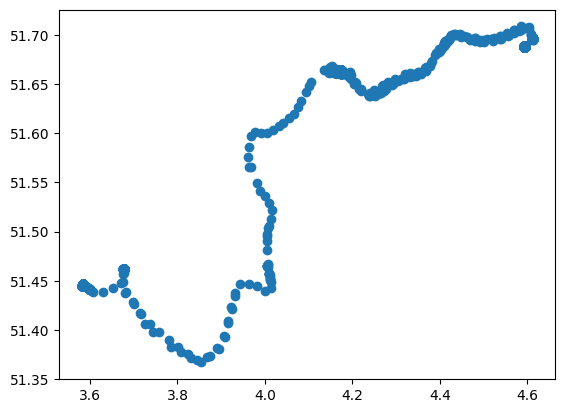

In [10]:
df_test3 = df[(df['vessel.type'] == 'dredging-underwater-ops')]
locations = plt.scatter(df_test3['navigation.location.long'], df_test3['navigation.location.lat'])

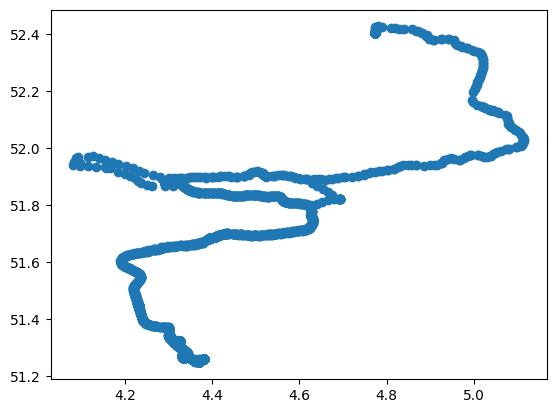

In [11]:
df_test4 = df[(df['vessel.type'] == 'tanker')]
locations = plt.scatter(df_test4['navigation.location.long'], df_test4['navigation.location.lat'])

In [12]:
# Create a folium map centered at the mean latitude and longitude
map_center = [df['navigation.location.lat'].mean(), df['navigation.location.long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for index, row in df.iterrows():
    folium.Marker(location=[row['navigation.location.lat'], row['navigation.location.long']]).add_to(marker_cluster)

scatter_html = mplleaflet.fig_to_html(plt.gcf())

# Create a folium iframe to embed the scatterplot HTML
scatter_frame = folium.IFrame(html=scatter_html, width=500, height=300)
scatter_popup = folium.Popup(scatter_frame, max_width=500)

# Add the scatterplot as a popup to the folium map
folium.Marker(location=map_center, popup=scatter_popup).add_to(m)
    
# m.save('filtered_data.html')
# m


In [13]:
# Functie om string naar datetime object om te zetten
def convert_to_datetime(datetime_str):
    return pd.to_datetime(datetime_str)

# Nieuwe kolommen toevoegen
df['navigation.time'] = df['navigation.time'].apply(convert_to_datetime)
df['date'] = df['navigation.time'].dt.date
df['time'] = df['navigation.time'].dt.time

# subset = df.iloc[19719:19730]
# print(subset)

C:\Users\romyl\AppData\Local\Temp\ipykernel_21792\1246212295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['navigation.time'] = df['navigation.time'].apply(convert_to_datetime)
C:\Users\romyl\AppData\Local\Temp\ipykernel_21792\1246212295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['navigation.time'].dt.date
C:\Users\romyl\AppData\Local\Temp\ipykernel_21792\1246212295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [16]:
df = df.sort_values(by=['vessel.name', 'group', 'navigation.time'])

# Get the rows where 'navigation.status' and 'vessel.name' changes
df['status_change'] = (df['navigation.status'] != df['navigation.status'].shift(1)) | (df['vessel.name'] != df['vessel.name'].shift(1))

# Increment group number only when status changes
df['group'] = (df['status_change'] == True).cumsum()



# Group by 'vessel.name', 'group', and 'navigation.status' and aggregate start and end time
result = df.groupby(['vessel.name', 'group', 'navigation.status', 'navigation.draught']).agg(start_time=('time', 'first'), end_time=('time', 'last'), start_date=('date', 'first'), end_date=('date', 'last'))

# Format the output
for index, row in result.iterrows():
    print(f"{index[0]}: {row['start_date'].isoformat()} {row['start_time'].isoformat()} - {row['end_date'].isoformat()} {row['end_time'].isoformat()} {index[2]}")

result


AARBURG: 2021-01-01 00:06:28 - 2021-01-01 14:36:28 moored
AARBURG: 2021-01-01 14:41:59 - 2021-01-01 15:41:58 under-way-using-engine
AARBURG: 2021-01-01 15:45:25 - 2021-01-01 16:00:27 moored
AARBURG: 2021-01-01 16:06:46 - 2021-01-01 16:27:00 under-way-using-engine
AARBURG: 2021-01-01 16:30:27 - 2021-01-01 22:51:28 moored
AARBURG: 2021-01-01 22:57:01 - 2021-01-01 23:37:01 under-way-using-engine
AARBURG: 2021-01-01 23:41:32 - 2021-01-02 00:41:33 moored
AARBURG: 2021-01-02 00:46:58 - 2021-01-02 01:06:59 under-way-using-engine
AARBURG: 2021-01-02 01:09:09 - 2021-01-02 01:45:06 moored
AARBURG: 2021-01-02 01:51:54 - 2021-01-02 02:21:55 under-way-using-engine
AARBURG: 2021-01-02 02:26:55 - 2021-01-02 14:53:38 moored
AARBURG: 2021-01-02 15:01:56 - 2021-01-02 16:16:56 under-way-using-engine
AARBURG: 2021-01-02 16:25:54 - 2021-01-02 20:55:54 moored
AARBURG: 2021-01-02 21:01:59 - 2021-01-02 21:30:50 under-way-using-engine
AARBURG: 2021-01-02 21:34:47 - 2021-01-03 00:58:46 moored
AARBURG: 2021-01-0

start_time  \
vessel.name   group navigation.status      navigation.draught              
AARBURG       1     moored                 2.5                  00:06:28   
              2     under-way-using-engine 2.5                  14:41:59   
              3     moored                 2.5                  15:45:25   
              4     under-way-using-engine 2.5                  16:06:46   
              5     moored                 2.5                  16:30:27   
...                                                                  ...   
SUNMI         870   moored                 5.8                  13:30:27   
              871   under-way-using-engine 4.1                  16:31:54   
              872   moored                 4.1                  10:00:44   
TRUDIE        873   under-way-using-engine 0.0                  00:01:54   
WESTERSCHELDE 874   undefined              1.9                  18:27:01   

                                                               end_time  \
vessel.name   group navigation.status      navigation.draught             
AARBURG       1     moored                 2.5                 14:36:28   
              2     under-way-using-engine 2.5                 15:41:58   
              3     moored                 2.5                 16:00:27   
              4     under-way-using-engine 2.5                 16:27:00   
              5     moored                 2.5                 22:51:28   
...                                                                 ...   
SUNMI         870   moored                 5.8                 08:00:28   
              871   under-way-using-engine 4.1                 09:56:53   
              872   moored                 4.1                 23:54:44   
TRUDIE        873   under-way-using-engine 0.0                 23:56:57   
WESTERSCHELDE 874   undefined              1.9                 23:56:14   

                                                               start_date  \
vessel.name   group navigation.status      navigation.draught               
AARBURG       1     moored                 2.5                 2021-01-01   
              2     under-way-using-engine 2.5                 2021-01-01   
              3     moored                 2.5                 2021-01-01   
              4     under-way-using-engine 2.5                 2021-01-01   
              5     moored                 2.5                 2021-01-01   
...                                                                   ...   
SUNMI         870   moored                 5.8                 2021-01-29   
              871   under-way-using-engine 4.1                 2021-01-30   
              872   moored                 4.1                 2021-01-31   
TRUDIE        873   under-way-using-engine 0.0                 2021-01-01   
WESTERSCHELDE 874   undefined              1.9                 2021-01-04   

                                                                 end_date  
vessel.name   group navigation.status      navigation.draught              
AARBURG       1     moored                 2.5                 2021-01-01  
              2     under-way-using-engine 2.5                 2021-01-01  
              3     moored                 2.5                 2021-01-01  
              4     under-way-using-engine 2.5                 2021-01-01  
              5     moored                 2.5                 2021-01-01  
...                                                                   ...  
SUNMI         870   moored                 5.8                 2021-01-30  
              871   under-way-using-engine 4.1                 2021-01-31  
              872   moored                 4.1                 2021-01-31  
TRUDIE        873   under-way-using-engine 0.0                 2021-01-31  
WESTERSCHELDE 874   undefined              1.9                 2021-01-31  

[887 rows x 4 columns]

In [17]:
# # Calculate time differences between consecutive records
df['time_diff'] = df['navigation.time'].diff()

# Handle cases where navigation.status or vessel.name changes (i.e., start of a new group)
df['time_diff'] = df['time_diff'].where(df['status_change'] == False, pd.NaT)

# Forward fill NaN values to propagate the time difference across the entire group
df['time_diff'] = df.groupby(['vessel.name', 'group'])['time_diff'].ffill()

# Group by 'vessel.name', 'group', and 'navigation.status' and aggregate total time
final = df.groupby(['vessel.name', 'group', 'navigation.status', 'navigation.draught', 'vessel.type']).agg(total_time=('time_diff', 'sum'),
                                                                       start_time=('time', 'first'),
                                                                       end_time=('time', 'last'),
                                                                       start_date=('date', 'first'),
                                                                       end_date=('date', 'last')).reset_index()

# Format the output
for index, row in final.iterrows():
    total_time = row['total_time']
    total_minutes = total_time.total_seconds() / 60  # Convert total time to minutes
    print(f"{row['vessel.name']}: {row['start_date'].isoformat()} {row['start_time'].isoformat()} - {row['end_date'].isoformat()} {row['end_time'].isoformat()} {row['navigation.status']} - Total Time: {total_minutes:.2f} minutes")

final['total_time_minutes'] = final['total_time'].dt.total_seconds() / 60
final.drop(columns=['total_time'], inplace=True)

final



AARBURG: 2021-01-01 00:06:28 - 2021-01-01 14:36:28 moored - Total Time: 870.00 minutes
AARBURG: 2021-01-01 14:41:59 - 2021-01-01 15:41:58 under-way-using-engine - Total Time: 59.98 minutes
AARBURG: 2021-01-01 15:45:25 - 2021-01-01 16:00:27 moored - Total Time: 15.03 minutes
AARBURG: 2021-01-01 16:06:46 - 2021-01-01 16:27:00 under-way-using-engine - Total Time: 20.23 minutes
AARBURG: 2021-01-01 16:30:27 - 2021-01-01 22:51:28 moored - Total Time: 381.02 minutes
AARBURG: 2021-01-01 22:57:01 - 2021-01-01 23:37:01 under-way-using-engine - Total Time: 40.00 minutes
AARBURG: 2021-01-01 23:41:32 - 2021-01-02 00:41:33 moored - Total Time: 60.02 minutes
AARBURG: 2021-01-02 00:46:58 - 2021-01-02 01:06:59 under-way-using-engine - Total Time: 20.02 minutes
AARBURG: 2021-01-02 01:09:09 - 2021-01-02 01:45:06 moored - Total Time: 35.95 minutes
AARBURG: 2021-01-02 01:51:54 - 2021-01-02 02:21:55 under-way-using-engine - Total Time: 30.02 minutes
AARBURG: 2021-01-02 02:26:55 - 2021-01-02 14:53:38 moored 

,vessel.name,group,navigation.status,navigation.draught,vessel.type,start_time,end_time,start_date,end_date,total_time_minutes
0,AARBURG,1,moored,2.5,cargo,00:06:28,14:36:28,2021-01-01,2021-01-01,870.000000
1,AARBURG,2,under-way-using-engine,2.5,cargo,14:41:59,15:41:58,2021-01-01,2021-01-01,59.983333
2,AARBURG,3,moored,2.5,cargo,15:45:25,16:00:27,2021-01-01,2021-01-01,15.033333
3,AARBURG,4,under-way-using-engine,2.5,cargo,16:06:46,16:27:00,2021-01-01,2021-01-01,20.233333
4,AARBURG,5,moored,2.5,cargo,16:30:27,22:51:28,2021-01-01,2021-01-01,381.016667
...,...,...,...,...,...,...,...,...,...,...
882,SUNMI,870,moored,5.8,cargo,13:30:27,08:00:28,2021-01-29,2021-01-30,1110.016667
883,SUNMI,871,under-way-using-engine,4.1,cargo,16:31:54,09:56:53,2021-01-30,2021-01-31,1044.983333
884,SUNMI,872,moored,4.1,cargo,10:00:44,23:54:44,2021-01-31,2021-01-31,834.000000
885,TRUDIE,873,under-way-using-engine,0.0,cargo,00:01:54,23:56:57,2021-01-01,2021-01-31,44635.050000


In [18]:
final_df = final[final['navigation.status'] == 'moored']
final_df


,vessel.name,group,navigation.status,navigation.draught,vessel.type,start_time,end_time,start_date,end_date,total_time_minutes
0,AARBURG,1,moored,2.5,cargo,00:06:28,14:36:28,2021-01-01,2021-01-01,870.000000
2,AARBURG,3,moored,2.5,cargo,15:45:25,16:00:27,2021-01-01,2021-01-01,15.033333
4,AARBURG,5,moored,2.5,cargo,16:30:27,22:51:28,2021-01-01,2021-01-01,381.016667
6,AARBURG,7,moored,2.5,cargo,23:41:32,00:41:33,2021-01-01,2021-01-02,60.016667
8,AARBURG,9,moored,2.5,cargo,01:09:09,01:45:06,2021-01-02,2021-01-02,35.950000
...,...,...,...,...,...,...,...,...,...,...
878,SUNMI,868,moored,5.8,cargo,02:49:08,03:55:08,2021-01-07,2021-01-07,69.000000
880,SUNMI,870,moored,4.0,cargo,08:03:27,15:15:28,2021-01-30,2021-01-30,435.000000
881,SUNMI,870,moored,4.1,cargo,15:21:27,16:21:28,2021-01-30,2021-01-30,66.000000
882,SUNMI,870,moored,5.8,cargo,13:30:27,08:00:28,2021-01-29,2021-01-30,1110.016667


In [19]:
moored_time = final_df[['total_time_minutes', 'navigation.draught']]
moored_array = moored_time.values.tolist()

print(moored_array)
print(len(moored_array))

vessel_type = final_df[['vessel.type']]
vessel_array = vessel_type.values.tolist()

print(vessel_array)
print(len(vessel_array))

[[870.0, 2.5], [15.033333333333333, 2.5], [381.01666666666665, 2.5], [60.016666666666666, 2.5], [35.95, 2.5], [746.7166666666667, 2.5], [270.0, 2.5], [203.98333333333332, 2.5], [389.95, 2.5], [125.25, 2.5], [17.566666666666666, 2.5], [39.016666666666666, 2.5], [78.03333333333333, 2.5], [9.016666666666667, 2.5], [299.8, 2.5], [63.0, 2.5], [521.95, 2.5], [6.116666666666666, 2.5], [78.53333333333333, 2.5], [80.93333333333334, 2.5], [83.9, 1.9], [164.96666666666667, 2.2], [32.63333333333333, 2.2], [108.01666666666667, 2.2], [74.98333333333333, 2.2], [18.033333333333335, 2.3], [20.3, 2.3], [8.983333333333333, 2.3], [63.56666666666667, 2.3], [30.033333333333335, 2.3], [35.55, 2.3], [48.25, 2.3], [23.983333333333334, 1.5], [14.166666666666666, 1.5], [26.766666666666666, 1.5], [8.766666666666667, 1.8], [8.95, 1.8], [48.0, 1.8], [3.8666666666666667, 1.8], [89.91666666666667, 1.8], [69.0, 1.8], [23.966666666666665, 1.8], [0.0, 1.8], [365.75, 1.8], [30.033333333333335, 1.8], [53.733333333333334, 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into a training set and test set
# x = moored_array en y = vessel_array
moored_array_train, moored_array_test, vessel_array_train, vessel_array_test = train_test_split(moored_array, vessel_array, test_size=0.3, random_state=42)

Accuracy using Softmax Regression: 0.9621212121212122


c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


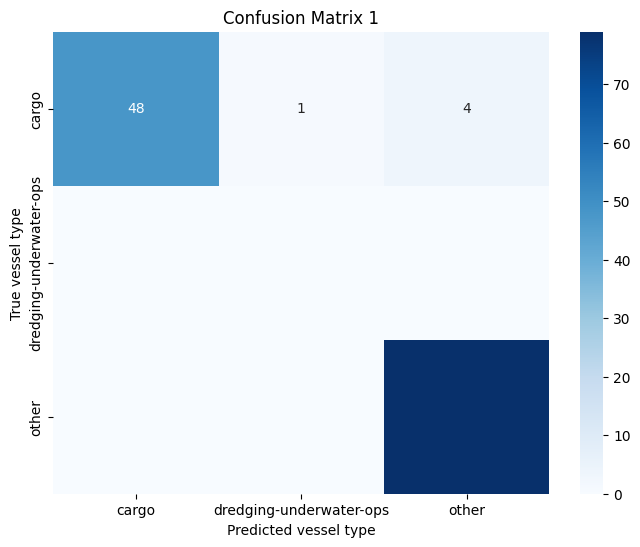

Classification Report:
                          precision    recall  f1-score   support

                  cargo       1.00      0.91      0.95        53
dredging-underwater-ops       0.00      0.00      0.00         0
                  other       0.95      1.00      0.98        79

               accuracy                           0.96       132
              macro avg       0.65      0.64      0.64       132
           weighted avg       0.97      0.96      0.97       132



c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Train a logistic regression model using the training set
# LogisticRegression(multi_class='multinominal', solver='', penalty='', max_iter=100)
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty=None, max_iter=200)
model1.fit(moored_array_train, vessel_array_train)

# predict results using the test set
vessel_array_prediction = model1.predict(moored_array_test)

# Calculate accuracy
accuracy1 = accuracy_score(vessel_array_test, vessel_array_prediction)
print("Accuracy using Softmax Regression:", accuracy1)


# Calculate the confusion matrix
conf_matrix1 = confusion_matrix(vessel_array_test, vessel_array_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=model1.classes_, yticklabels=model1.classes_)
plt.xlabel('Predicted vessel type')
plt.ylabel('True vessel type')
plt.title('Confusion Matrix 1')
plt.show()

# Print classification report
class_report1 = classification_report(vessel_array_test, vessel_array_prediction)
print("Classification Report:\n", class_report1)

Accuracy using Softmax Regression: 0.9621212121212122


c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


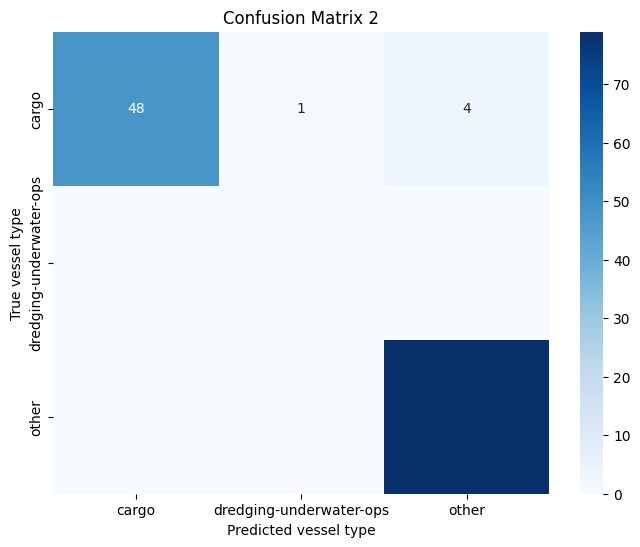

Classification Report:
                          precision    recall  f1-score   support

                  cargo       1.00      0.91      0.95        53
dredging-underwater-ops       0.00      0.00      0.00         0
                  other       0.95      1.00      0.98        79

               accuracy                           0.96       132
              macro avg       0.65      0.64      0.64       132
           weighted avg       0.97      0.96      0.97       132



c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Train a logistic regression model using the training set
# LogisticRegression(multi_class='multinominal', solver='', penalty='', max_iter=100)
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', max_iter=200)
model2.fit(moored_array_train, vessel_array_train)

# predict results using the test set
vessel_array_prediction = model2.predict(moored_array_test)

# Calculate accuracy
accuracy2 = accuracy_score(vessel_array_test, vessel_array_prediction)
print("Accuracy using Softmax Regression:", accuracy2)


# Calculate the confusion matrix
conf_matrix2 = confusion_matrix(vessel_array_test, vessel_array_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=model2.classes_, yticklabels=model2.classes_)
plt.xlabel('Predicted vessel type')
plt.ylabel('True vessel type')
plt.title('Confusion Matrix 2')
plt.show()

# Print classification report
class_report2 = classification_report(vessel_array_test, vessel_array_prediction)
print("Classification Report:\n", class_report2)

c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy using Softmax Regression: 0.9621212121212122


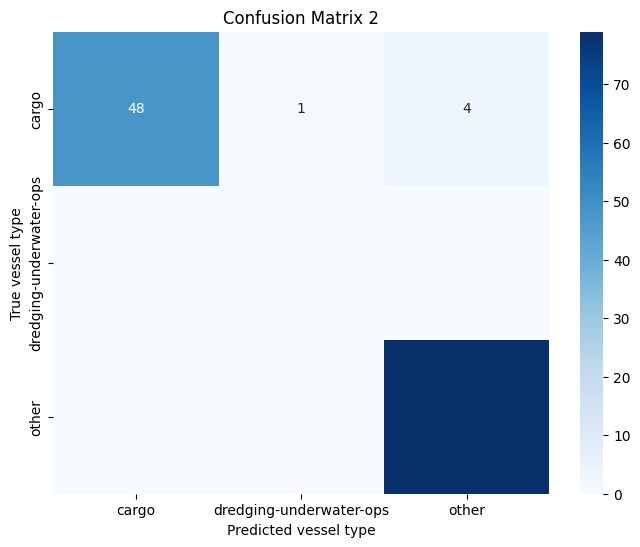

Classification Report:
                          precision    recall  f1-score   support

                  cargo       1.00      0.91      0.95        53
dredging-underwater-ops       0.00      0.00      0.00         0
                  other       0.95      1.00      0.98        79

               accuracy                           0.96       132
              macro avg       0.65      0.64      0.64       132
           weighted avg       0.97      0.96      0.97       132



c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\romyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# datapoints also need to be scaled into dataset with mean 0 and std dev = 1
moored_array_train_scale = preprocessing.scale(moored_array_train)
moored_array_test_scale = preprocessing.scale(moored_array_test)

# Train a logistic regression model using the training set
# LogisticRegression(multi_class='multinominal', solver='', penalty='', max_iter=100)
model2 = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', max_iter=200)
model2.fit(moored_array_train, vessel_array_train)

# predict results using the test set
vessel_array_prediction = model2.predict(moored_array_test)

# Calculate accuracy
accuracy2 = accuracy_score(vessel_array_test, vessel_array_prediction)
print("Accuracy using Softmax Regression:", accuracy2)


# Calculate the confusion matrix
conf_matrix2 = confusion_matrix(vessel_array_test, vessel_array_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=model2.classes_, yticklabels=model2.classes_)
plt.xlabel('Predicted vessel type')
plt.ylabel('True vessel type')
plt.title('Confusion Matrix 2')
plt.show()

# Print classification report
class_report2 = classification_report(vessel_array_test, vessel_array_prediction)
print("Classification Report:\n", class_report2)

In [21]:
print(final.to_string(index=False))

   vessel.name  group      navigation.status  navigation.draught             vessel.type start_time end_time start_date   end_date  total_time_minutes
       AARBURG      1                 moored                 2.5                   cargo   00:06:28 14:36:28 2021-01-01 2021-01-01          870.000000
       AARBURG      2 under-way-using-engine                 2.5                   cargo   14:41:59 15:41:58 2021-01-01 2021-01-01           59.983333
       AARBURG      3                 moored                 2.5                   cargo   15:45:25 16:00:27 2021-01-01 2021-01-01           15.033333
       AARBURG      4 under-way-using-engine                 2.5                   cargo   16:06:46 16:27:00 2021-01-01 2021-01-01           20.233333
       AARBURG      5                 moored                 2.5                   cargo   16:30:27 22:51:28 2021-01-01 2021-01-01          381.016667
       AARBURG      6 under-way-using-engine                 2.5                   cargo   22: